# Pokemon Clustering

In [34]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.cluster import KMeans

In [53]:
PokeData = pd.read_csv("Pokemon.csv")
PokeData

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


In [55]:
GrassData = PokeData[PokeData["Type 1"] == "Grass"]
FireData = PokeData[PokeData["Type 1"] == "Fire"]
WaterData = PokeData[PokeData["Type 1"] == "Water"]
BugData = PokeData[PokeData["Type 1"] == "Bug"]

Gen1 = PokeData[PokeData["Generation"] == 1]
Gen2 = PokeData[PokeData["Generation"] == 2]
Gen3 = PokeData[PokeData["Generation"] == 3]
Gen4 = PokeData[PokeData["Generation"] == 4]
Gen5 = PokeData[PokeData["Generation"] == 5]
PokeData
print(Gen1["HP"].mean())
print(Gen2["HP"].mean())
print(Gen3["HP"].mean())
print(Gen4["HP"].mean())
print(Gen5["HP"].mean())
print("")
print(Gen1["Attack"].mean())
print(Gen2["Attack"].mean())
print(Gen3["Attack"].mean())
print(Gen4["Attack"].mean())
print(Gen5["Attack"].mean())
PokeData

65.81927710843374
71.20754716981132
66.54375
73.08264462809917
71.78787878787878

76.63855421686748
72.02830188679245
81.625
82.86776859504133
82.06666666666666


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


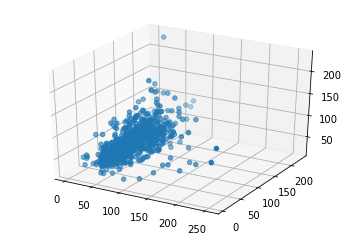

In [56]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(PokeData["HP"], PokeData["Defense"],PokeData["Sp. Def"])
plt.show()